In [1]:
# parameters
config_dir = "../experiments"
exp_name = "072_save_input_valid/base_all_save"

In [2]:
%cd /kaggle/working

from pathlib import Path

from hydra import compose, initialize
from omegaconf import OmegaConf

with initialize(
    version_base=None, config_path=f"{config_dir}/{exp_name.split('/')[0]}"
):
    cfg = compose(
        config_name="config.yaml",
        overrides=[f"exp={exp_name.split('/')[-1]}"],
        return_hydra_config=True,
    )
import pickle

import matplotlib.pyplot as plt
import numpy as np
import polars as pl
import seaborn as sns

from utils.metric import score

# 定数定義
output_dir = Path(f"output/experiments/{exp_name}")
gcs_path = f"gs://{cfg.dir.gcs_bucket}/{cfg.dir.gcs_base_dir}/experiments/{exp_name}/"

# カラムの定義
single_targets = [
    "cam_out_NETSW",
    "cam_out_FLWDS",
    "cam_out_PRECSC",
    "cam_out_PRECC",
    "cam_out_SOLS",
    "cam_out_SOLL",
    "cam_out_SOLSD",
    "cam_out_SOLLD",
]
seq_targets = [
    "ptend_t",
    "ptend_q0001",
    "ptend_q0002",
    "ptend_q0003",
    "ptend_u",
    "ptend_v",
]
target_columns = []
for col in seq_targets:
    for i in range(60):
        target_columns.append(f"{col}_{i}")
target_columns.extend(single_targets)


# 結果などの読み込み
r2_score_dict = pickle.load(open(output_dir / "r2_score_dict.pkl", "rb"))
r2_score_dict_fill = pickle.load(open(output_dir / "r2_score_dict_fill.pkl", "rb"))

/kaggle/working


In [47]:
ss_df = pl.read_csv(
    "input/leap-atmospheric-physics-ai-climsim/sample_submission.csv", n_rows=1
)
weight_array = ss_df.select([x for x in ss_df.columns if x != "sample_id"]).to_numpy()[
    0
]

In [4]:
print("read original_xs")
original_xs = pl.read_parquet(gcs_path + "original_xs.parquet", retries=5)

read original_xs


In [5]:
print("read predict")
predict_df = pl.read_parquet(gcs_path + "predict.parquet", retries=5)
print("read label")
label_df = pl.read_parquet(gcs_path + "label.parquet", retries=5)

read predict
read label


In [48]:
predict_df_pandas = predict_df.to_pandas()
predict_df_pandas.iloc[:, 1:361] = original_xs[:, 1:361] * (1 / -1200)

In [12]:
for i in range(5):
    print(i)
    r2_scores = score(
        label_df.to_pandas().sample(65000, random_state=i),
        predict_df_pandas.sample(65000, random_state=i),
        "index",
        multioutput="raw_values",
    )
    r2_score_dict_const = {
        col: r2 for col, r2 in dict(zip(cfg.cols.col_names, r2_scores)).items()
    }
    for key, val in r2_score_dict_const.items():
        if val > 0.2:
            print(key, val)
    print()

0
ptend_q0002_12 1.0
ptend_q0002_13 1.0
ptend_q0002_14 1.0
ptend_q0002_15 1.0
ptend_q0002_16 1.0
ptend_q0002_17 1.0
ptend_q0002_18 1.0
ptend_q0002_19 1.0
ptend_q0002_20 1.0
ptend_q0002_21 1.0
ptend_q0002_22 1.0
ptend_q0002_23 1.0
ptend_q0002_24 1.0
ptend_q0002_25 1.0
ptend_q0002_26 1.0
ptend_q0002_27 1.0
ptend_q0002_28 0.9958928880835295
cam_out_NETSW 0.9820273879350341
cam_out_FLWDS 0.9849768328966523
cam_out_PRECSC 0.8973700176084343
cam_out_PRECC 0.8875821163324945
cam_out_SOLS 0.9762730588221942
cam_out_SOLL 0.9662690198654033
cam_out_SOLSD 0.956733517736127
cam_out_SOLLD 0.8917967523079683

1
ptend_q0002_12 1.0
ptend_q0002_13 1.0
ptend_q0002_14 1.0
ptend_q0002_15 1.0
ptend_q0002_16 1.0
ptend_q0002_17 1.0
ptend_q0002_18 1.0
ptend_q0002_19 1.0
ptend_q0002_20 1.0
ptend_q0002_21 1.0
ptend_q0002_22 1.0
ptend_q0002_23 1.0
ptend_q0002_24 1.0
ptend_q0002_25 1.0
ptend_q0002_26 1.0
ptend_q0002_28 0.9924234946256194
cam_out_NETSW 0.98221125930909
cam_out_FLWDS 0.9846111428220947
cam_out_PREC

In [13]:
r2_scores = score(
    label_df.to_pandas().head(10000),
    predict_df_pandas.head(10000),
    "index",
    multioutput="raw_values",
)
r2_score_dict_const = {
    col: r2 for col, r2 in dict(zip(cfg.cols.col_names, r2_scores)).items()
}
for key, val in r2_score_dict_const.items():
    if val > 0.2:
        print(key, val)

ptend_q0002_12 1.0
ptend_q0002_13 1.0
ptend_q0002_14 1.0
ptend_q0002_15 1.0
ptend_q0002_16 1.0
ptend_q0002_17 1.0
ptend_q0002_18 1.0
ptend_q0002_19 1.0
ptend_q0002_20 1.0
ptend_q0002_21 1.0
ptend_q0002_22 1.0
ptend_q0002_23 1.0
ptend_q0002_24 1.0
ptend_q0002_25 1.0
ptend_q0002_26 1.0
ptend_q0002_27 1.0
ptend_q0002_28 1.0
ptend_q0003_12 1.0
ptend_q0003_13 1.0
ptend_q0003_14 1.0
cam_out_NETSW 0.9770153340800384
cam_out_FLWDS 0.9856637707923199
cam_out_PRECSC 0.8836136287034072
cam_out_PRECC 0.8937926651998129
cam_out_SOLS 0.9724602761651538
cam_out_SOLL 0.9636847710283908
cam_out_SOLSD 0.946459085281217
cam_out_SOLLD 0.8774413482001421


In [14]:
r2_scores = score(
    label_df.to_pandas(),
    predict_df_pandas.copy(),
    "index",
    multioutput="raw_values",
)
r2_score_dict_const = {
    col: r2 for col, r2 in dict(zip(cfg.cols.col_names, r2_scores)).items()
}
for key, val in r2_score_dict_const.items():
    print(key, val)

ptend_t_0 -21583800.297563944
ptend_t_1 -10706852.667896824
ptend_t_2 -12764769.374675844
ptend_t_3 -8828588.501657696
ptend_t_4 -5437182.487759762
ptend_t_5 -3829373.537340334
ptend_t_6 -4214457.9767339965
ptend_t_7 -6773694.245450504
ptend_t_8 -15327108.023036696
ptend_t_9 -24437423.939742625
ptend_t_10 -40244831.827816054
ptend_t_11 -65894153.7610146
ptend_t_12 -117066565.3083352
ptend_t_13 -200322649.14107233
ptend_t_14 -354272349.1214249
ptend_t_15 -545592827.0395188
ptend_t_16 -641831541.9113151
ptend_t_17 -471382236.43997693
ptend_t_18 -229374110.7832934
ptend_t_19 -147521165.2073545
ptend_t_20 -131154561.32937701
ptend_t_21 -116603649.15045257
ptend_t_22 -97731304.21796162
ptend_t_23 -77760260.8276574
ptend_t_24 -59761561.30706021
ptend_t_25 -45593470.12868179
ptend_t_26 -34343334.06454466
ptend_t_27 -26045572.88679904
ptend_t_28 -20155310.8531878
ptend_t_29 -15958506.91876539
ptend_t_30 -13331123.453697288
ptend_t_31 -11916455.686714277
ptend_t_32 -11206863.563720925
ptend_t_3

## 分布を確認

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import polars as pl

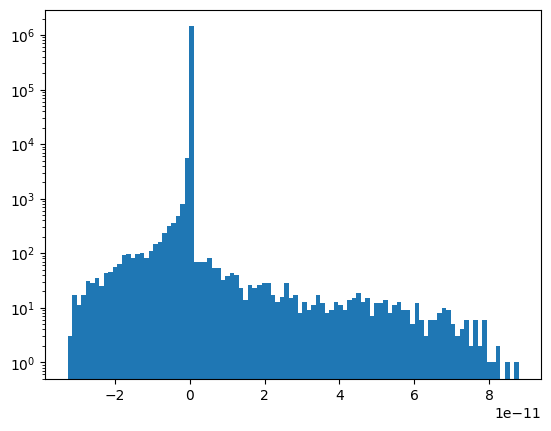

In [24]:
col = "ptend_q0003_12"
index = cfg.cols.col_names.index(col) + 1
plt.hist(label_df[:, index].to_numpy(), bins=100, log=True)
plt.show()

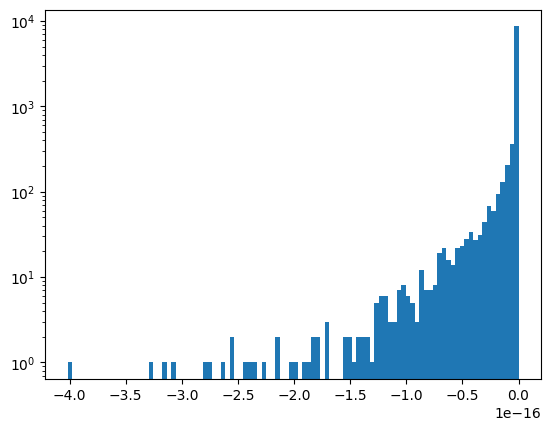

In [23]:
col = "ptend_q0003_12"
index = cfg.cols.col_names.index(col) + 1
plt.hist(label_df[:, index].to_numpy()[:10000], bins=100, log=True)
plt.show()

### もとのカラムとの関係

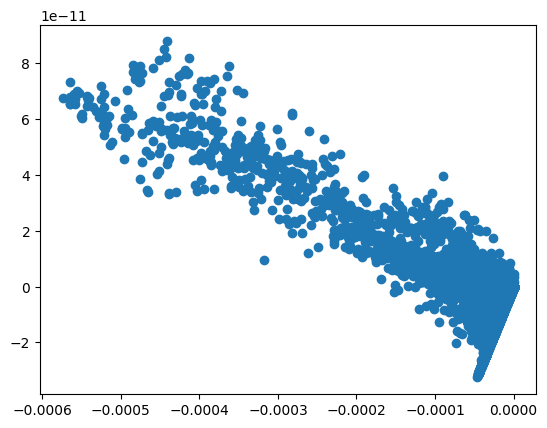

In [49]:
col = "ptend_q0003_12"
index = cfg.cols.col_names.index(col) + 1
data1 = original_xs[:, index].to_numpy() * (-1200)
data2 = label_df[:, index].to_numpy()

plt.scatter(data1, data2)
plt.show()

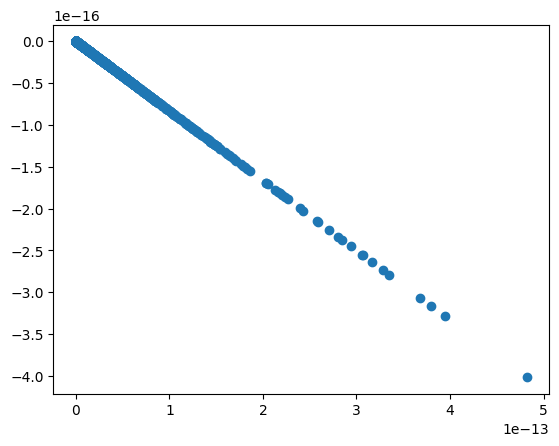

In [26]:
col = "ptend_q0003_12"
index = cfg.cols.col_names.index(col) + 1
data1 = original_xs[:, index].to_numpy()[:10000]
data2 = label_df[:, index].to_numpy()[:10000]

plt.scatter(data1, data2)
plt.show()

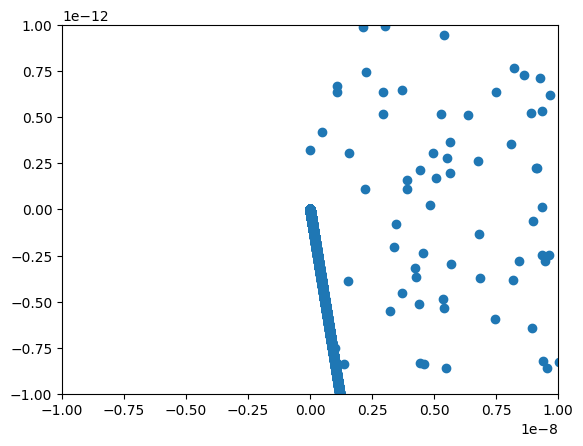

In [39]:
col = "ptend_q0003_15"
index = cfg.cols.col_names.index(col) + 1
data1 = original_xs[:, index].to_numpy()
data2 = label_df[:, index].to_numpy()

plt.scatter(data1, data2)
plt.xlim([-1e-8, 1e-8])
plt.ylim([-1e-12, 1e-12])
plt.show()

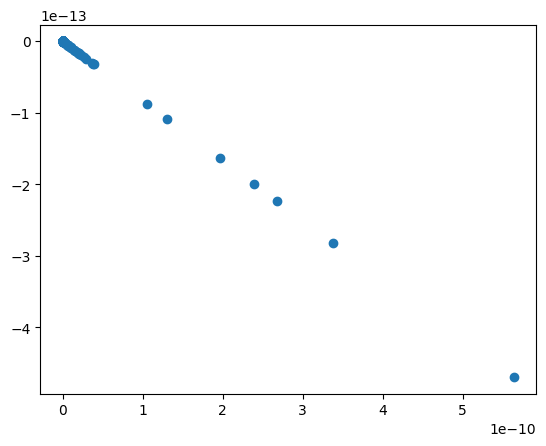

In [35]:
col = "ptend_q0003_15"
index = cfg.cols.col_names.index(col) + 1
data1 = original_xs[:, index].to_numpy()[:1000]
data2 = label_df[:, index].to_numpy()[:1000]

plt.scatter(data1, data2)
plt.show()

## cli

In [60]:
predict_df_pandas = predict_df.to_pandas()
for i in range(120, 240):
    predict_df_pandas.iloc[:, i + 1] = np.clip(
        predict_df_pandas.iloc[:, i + 1], original_xs[:, i + 1] * (1 / -1200), None
    )

In [61]:
# fill_target で指定された列を埋める
for col in cfg.exp.fill_target:
    index = cfg.cols.col_names.index(col)
    predict_df_pandas.iloc[:, index + 1] = (
        original_xs[:, index + 1] / (-1200)
    ).to_numpy()

In [62]:
import pandas as pd

# weight をかける
predict_weight_df = pd.DataFrame(
    predict_df_pandas.iloc[:, 1:].to_numpy() * weight_array,
    columns=[i for i in range(predict_df_pandas.shape[1] - 1)],
).reset_index()
label_weight_df = pd.DataFrame(
    label_df[:, 1:].to_numpy() * weight_array,
    columns=[i for i in range(predict_df_pandas.shape[1] - 1)],
).reset_index()

In [63]:
r2_scores = score(
    label_weight_df,
    predict_weight_df,
    "index",
    multioutput="raw_values",
)
r2_score_dict_const = {
    col: r2 for col, r2 in dict(zip(cfg.cols.col_names, r2_scores)).items()
}

print("r2: ", np.mean(list(r2_score_dict_const.values())))

r2:  0.7372641570239054


In [64]:
r2_score_dict_const['ptend_q0002_27'] = 1
print("r2: ", np.mean(list(r2_score_dict_const.values())))

r2:  0.7373959020338378


## 全体概要

In [19]:
print("r2: ", np.mean(list(r2_score_dict.values())))
print("r2 fill: ", np.mean(list(r2_score_dict_fill.values())))

r2:  -246449864947205.7
r2 fill:  0.7373959020338378


## sequential target

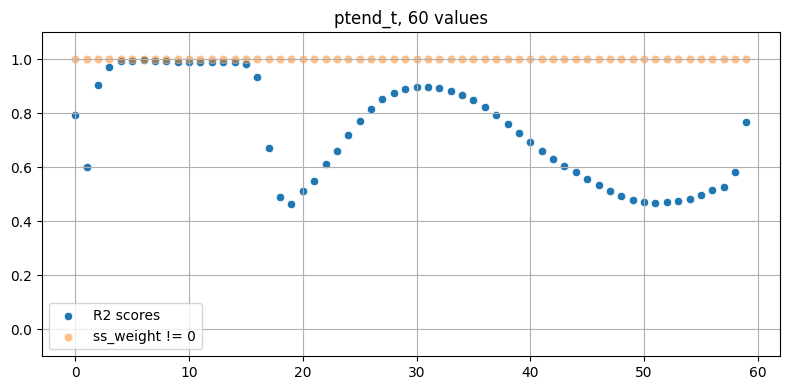

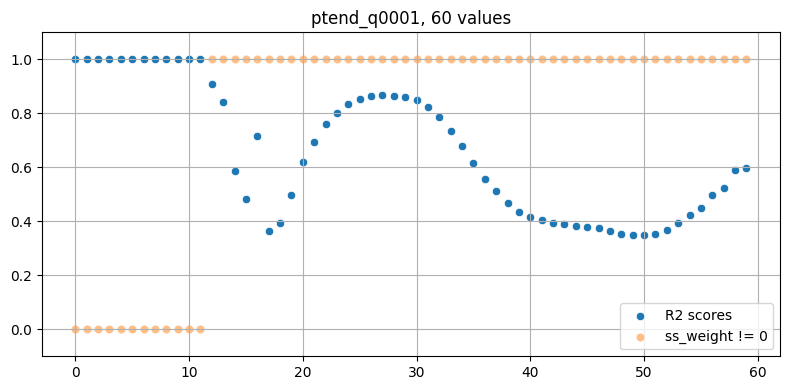

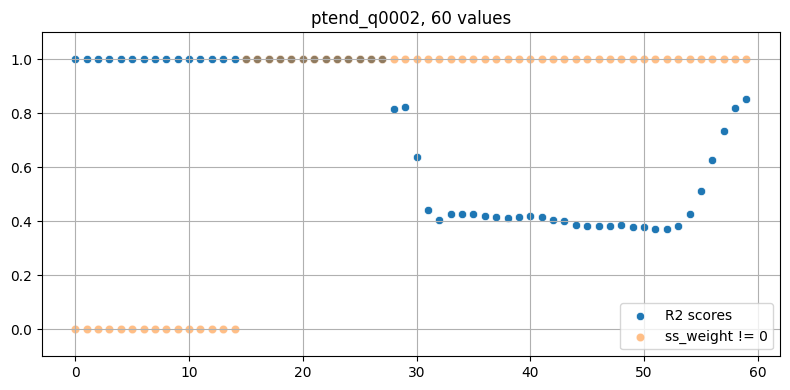

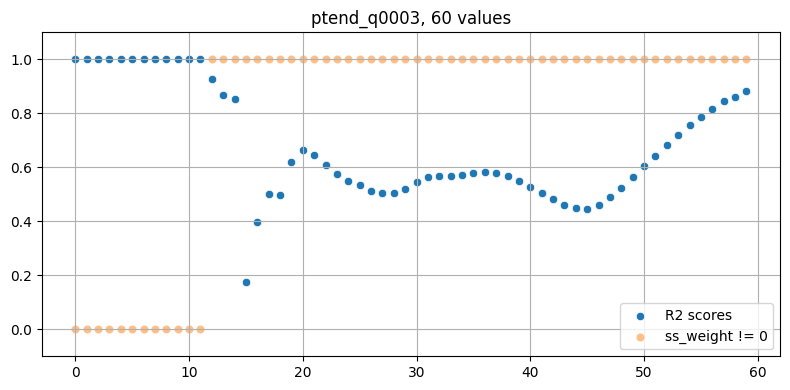

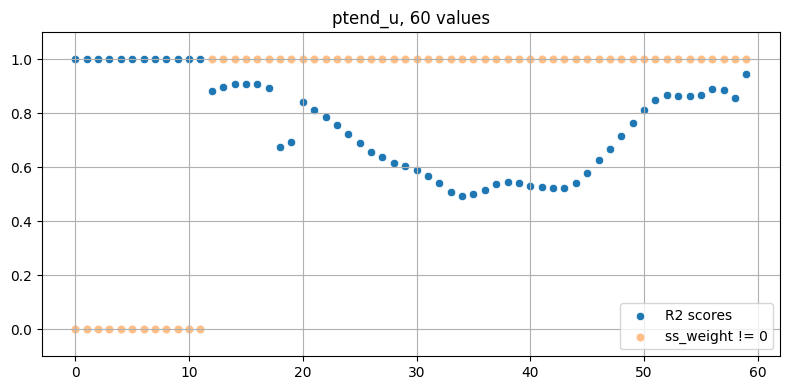

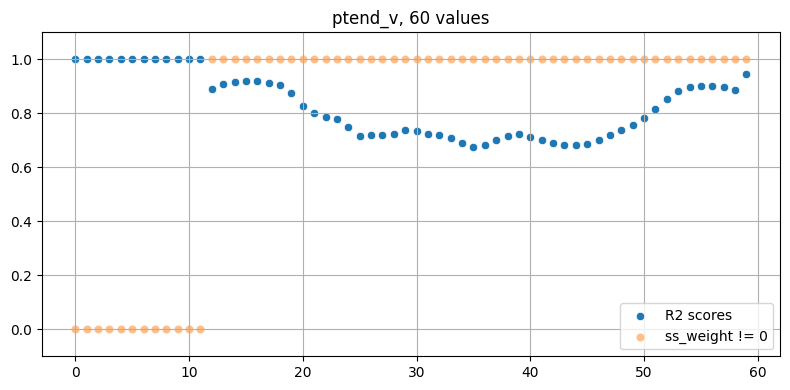

In [8]:
for col in seq_targets:
    fig, ax = plt.subplots(figsize=(8, 4))

    sns.scatterplot(
        x=range(60),
        y=[r2_score_dict_fill[f"{col}_{i}"] for i in range(60)],
        label="R2 scores",
        ax=ax,
    )
    sns.scatterplot(
        x=range(60),
        y=[(ss_df[f"{col}_{i}"].to_numpy()[0] != 0) for i in range(60)],
        alpha=0.5,
        label="ss_weight != 0",
        ax=ax,
    )

    ax.set_title(f"{col}, 60 values")
    ax.grid(True)
    ax.set_ylim(-0.1, 1.1)
    ax.legend()

    plt.tight_layout()
    plt.show()

## single target

cam_out_NETSW : -0.15841711043224405
cam_out_FLWDS : -0.04209240829644978
cam_out_PRECSC : -0.0027535692127909073
cam_out_PRECC : -0.04718778265198509
cam_out_SOLS : -0.18961415563828177
cam_out_SOLL : -0.07873439621917644
cam_out_SOLSD : -0.1920416879549134
cam_out_SOLLD : -0.06974011109510814


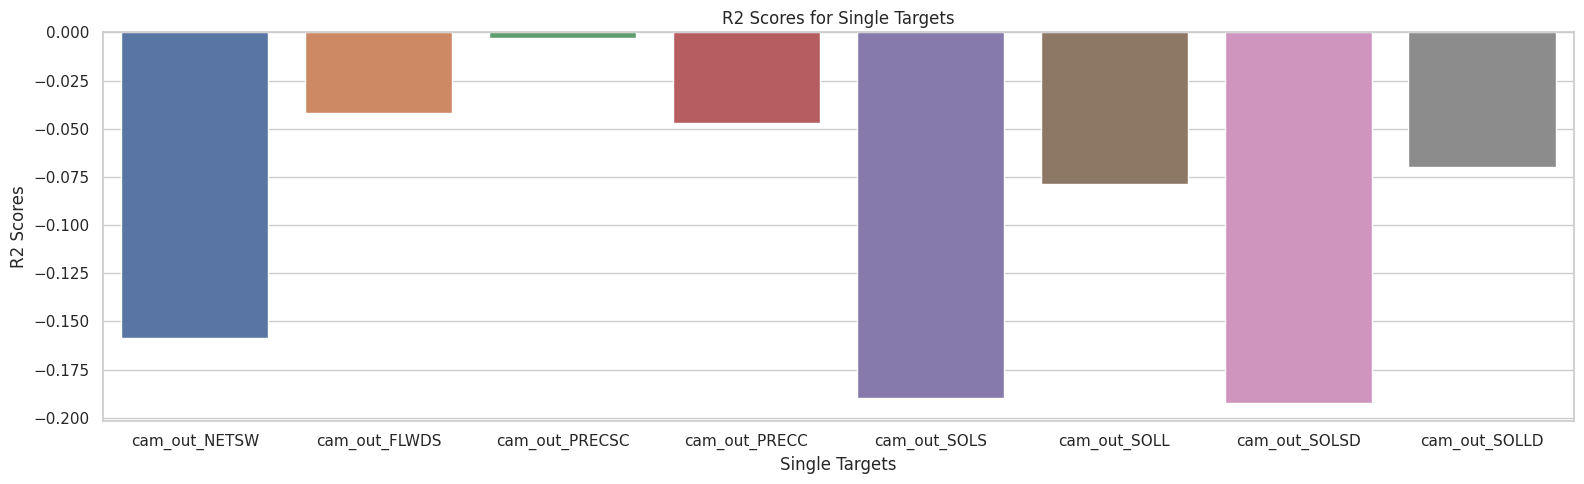

In [5]:
# single scaler target
plt.figure(figsize=(16, 5))
sns.set(style="whitegrid")

sns.barplot(
    x=np.array(single_targets),
    y=np.array([r2_score_dict[col] for col in single_targets]),
)

plt.xlabel("Single Targets")
plt.ylabel("R2 Scores")
plt.title("R2 Scores for Single Targets")

for col in single_targets:
    print(f"{col} : {r2_score_dict[col]}")

plt.tight_layout()
plt.show()

## マイナスが大きいターゲットについて確認

In [6]:
preds = predict_df[:, 1:].to_numpy()
labels = label_df[:, 1:].to_numpy()

scale_dir = ""
y_nanmean = np.load(Path(cfg.exp.scale_dir) / f"y_nanmean_{cfg.exp.norm_name}.npy")
y_rms_sub = np.load(Path(cfg.exp.scale_dir) / f"y_rms_sub_{cfg.exp.norm_name}.npy")
y_lower_bound = np.load(
    Path(cfg.exp.scale_dir) / f"y_lower_bound_{cfg.exp.norm_name}.npy"
)
y_upper_bound = np.load(
    Path(cfg.exp.scale_dir) / f"y_upper_bound_{cfg.exp.norm_name}.npy"
)


for ci, col in enumerate(target_columns):
    r2_score = r2_score_dict[col]
    if r2_score > 0.01:
        continue

    print("【", col, "】")
    print(f"{r2_score=:.5g}")

    mse = (preds[:, ci] - labels[:, ci]) ** 2
    base = (labels[:, ci] - labels[:, ci].mean()) ** 2
    ri = np.nonzero(mse == np.max(mse))[0][0]
    print(f"{ri=}, {ci=}")
    print(f"{preds[ri,ci]=:.5g}, {labels[ri,ci]=:.5g}")
    print(f"{mse[ri]=:.5g}, r2: 1-({mse.mean()=:.5g})/({base.mean()=:.5g})")

    print(
        f"{y_rms_sub[ci]=:.5g}, {y_nanmean[ci]=:.5g}, {y_lower_bound[ci]=:.5g}, {y_upper_bound[ci]=:.5g}"
    )
    print(
        f"{preds[:,ci].mean()=:.5g}, {preds[:,ci].min()=:.5g}, {preds[:,ci].max()=:.5g}"
    )
    print(
        f"{labels[:,ci].mean()=:.5g}, {labels[:,ci].min()=:.5g}, {labels[:,ci].max()=:.5g}"
    )
    print()

【 ptend_t_0 】
r2_score=-0.292
ri=379, ci=0
preds[ri,ci]=-2.4652e-06, labels[ri,ci]=5.9823e-05
mse[ri]=3.8798e-09, r2: 1-(mse.mean()=9.1867e-10)/(base.mean()=7.1104e-10)
y_rms_sub[ci]=3.0425e-05, y_nanmean[ci]=1.0277e-05, y_lower_bound[ci]=-0.0011344, y_upper_bound[ci]=0.0021631
preds[:,ci].mean()=-2.5419e-06, preds[:,ci].min()=-2.6243e-06, preds[:,ci].max()=-2.4408e-06
labels[:,ci].mean()=1.1865e-05, labels[:,ci].min()=-4.3717e-05, labels[:,ci].max()=5.9823e-05

【 ptend_t_1 】
r2_score=-0.00079644
ri=353, ci=1
preds[ri,ci]=-1.0063e-05, labels[ri,ci]=-0.00013155
mse[ri]=1.4759e-08, r2: 1-(mse.mean()=1.8604e-09)/(base.mean()=1.8589e-09)
y_rms_sub[ci]=4.1836e-05, y_nanmean[ci]=-7.0465e-06, y_lower_bound[ci]=-0.0011881, y_upper_bound[ci]=0.0016273
preds[:,ci].mean()=-9.7376e-06, preds[:,ci].min()=-1.013e-05, preds[:,ci].max()=-9.4282e-06
labels[:,ci].mean()=-1.1286e-05, labels[:,ci].min()=-0.00013155, labels[:,ci].max()=7.682e-05

【 ptend_t_2 】
r2_score=-0.096498
ri=721, ci=2
preds[ri,ci]=-

## 値が大きくないやつ

In [7]:
preds = predict_df[:, 1:].to_numpy()
labels = label_df[:, 1:].to_numpy()

scale_dir = ""
y_nanmean = np.load(Path(cfg.exp.scale_dir) / f"y_nanmean_{cfg.exp.norm_name}.npy")
y_rms_sub = np.load(Path(cfg.exp.scale_dir) / f"y_rms_sub_{cfg.exp.norm_name}.npy")
y_lower_bound = np.load(
    Path(cfg.exp.scale_dir) / f"y_lower_bound_{cfg.exp.norm_name}.npy"
)
y_upper_bound = np.load(
    Path(cfg.exp.scale_dir) / f"y_upper_bound_{cfg.exp.norm_name}.npy"
)


for ci, col in enumerate(target_columns):
    r2_score = r2_score_dict[col]
    if r2_score > 0.5:
        continue

    print("【", col, "】")
    print(f"{r2_score=:.5g}")

    mse = (preds[:, ci] - labels[:, ci]) ** 2
    base = (labels[:, ci] - labels[:, ci].mean()) ** 2
    ri = np.nonzero(mse == np.max(mse))[0][0]
    print(f"{ri=}, {ci=}")
    print(f"{preds[ri,ci]=:.5g}, {labels[ri,ci]=:.5g}")
    print(f"{mse[ri]=:.5g}, r2: 1-({mse.mean()=:.5g})/({base.mean()=:.5g})")

    print(
        f"{y_rms_sub[ci]=:.5g}, {y_nanmean[ci]=:.5g}, {y_lower_bound[ci]=:.5g}, {y_upper_bound[ci]=:.5g}"
    )
    print(
        f"{preds[:,ci].mean()=:.5g}, {preds[:,ci].min()=:.5g}, {preds[:,ci].max()=:.5g}"
    )
    print(
        f"{labels[:,ci].mean()=:.5g}, {labels[:,ci].min()=:.5g}, {labels[:,ci].max()=:.5g}"
    )
    print()

【 ptend_t_0 】
r2_score=-0.292
ri=379, ci=0
preds[ri,ci]=-2.4652e-06, labels[ri,ci]=5.9823e-05
mse[ri]=3.8798e-09, r2: 1-(mse.mean()=9.1867e-10)/(base.mean()=7.1104e-10)
y_rms_sub[ci]=3.0425e-05, y_nanmean[ci]=1.0277e-05, y_lower_bound[ci]=-0.0011344, y_upper_bound[ci]=0.0021631
preds[:,ci].mean()=-2.5419e-06, preds[:,ci].min()=-2.6243e-06, preds[:,ci].max()=-2.4408e-06
labels[:,ci].mean()=1.1865e-05, labels[:,ci].min()=-4.3717e-05, labels[:,ci].max()=5.9823e-05

【 ptend_t_1 】
r2_score=-0.00079644
ri=353, ci=1
preds[ri,ci]=-1.0063e-05, labels[ri,ci]=-0.00013155
mse[ri]=1.4759e-08, r2: 1-(mse.mean()=1.8604e-09)/(base.mean()=1.8589e-09)
y_rms_sub[ci]=4.1836e-05, y_nanmean[ci]=-7.0465e-06, y_lower_bound[ci]=-0.0011881, y_upper_bound[ci]=0.0016273
preds[:,ci].mean()=-9.7376e-06, preds[:,ci].min()=-1.013e-05, preds[:,ci].max()=-9.4282e-06
labels[:,ci].mean()=-1.1286e-05, labels[:,ci].min()=-0.00013155, labels[:,ci].max()=7.682e-05

【 ptend_t_2 】
r2_score=-0.096498
ri=721, ci=2
preds[ri,ci]=-